# ESSC2030 - Lecture 11 Geoscience Applications
## Tutorial 1/3 - Data Visualization: Stereonet and Rose Map

#### Created by Jw on 2020/09/13

Geoscientists often work with 3-dimenstional lines, planes and their relationsips in the geological structures, such as fault, fold, dyke intrusions and beddings in the subsurface. Stereonet is one the most common techniques used to illustrate these 3D geometry in a simple and neat 2D visualization. It also offers a clear anagular relationships between different shapes and geometries, thus providing structural analysis for geologist.  

In addition, stereonet is also used to displace principle stress directions and fault movement in geophysics. If you could recall the beachball diagram in indicating fault motion in ESSC2010, it is also a stereographic projection of a fault movement. Detailed instruction on the use of Sterenet will be taught in ESSC3100.

Here, we ultilize the package [`mplstereonet`](https://github.com/joferkington/mplstereonet/) to plot different **stereographic projections** and the **stereonets** in python. `mplstereonet` is a python2 code incoperates `matplotlib.pyplot` to plot stereonet projections. It uses `axes` object in matplotlib to create plot for planes, lines and rakes and conduct probability analysis for real earth problems. 
   1. [Introduction to Stereonet Basic and `mplstereonet`](#part1)
   2. [Application: Lai Chi Chong Bedding Data Determination](#part2)
   3. [Advance Application: Fold Axis Determination](#part3) [Optional]
   4. [Fault and Principle Stress Distribution](#part4) [Optional]
   
Further Reading:
- [Stereonets and Rose Diagrams in Python by Geology&Python](http://geologyandpython.com/structural_geology.html)
- [mplstereonet documentation](https://mplstereonet.readthedocs.io/en/latest/index.html)


<a id='part1'></a>
### Part 1 Stereonet Basic

Stereographic projection is a southern sphere projection that projects 3D planes and lineations (Line) on to a 2D circle. 
    
   <img src="fig/Stereographic_projection.jpg">
   
Therefore, any planar, linear object and their relationship can be displayed in the 2D stereonet. The following we would try a simple case considering a bedding and a fault plane projected onto the stereonet.

***

##### 1.1 First import the relevant packages

In [1]:
# Python2 ipynb
# For google colab
!pip install mplstereonet


import numpy as np
import mplstereonet 
import matplotlib.pyplot as plt

%matplotlib inline

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


##### 1.2 Create variable for dip and strike for the planer structure

In geoscience, we have a naming convection for the dip and strike of a planar structure:

    <Strike>/<dip>
Considering a bedding N30E/15 and a fault S60E/ 30 in a sedimentary structure, please store variables of 

- `strike1`, `dip1` for bedding and,
- `strike2`, `dip2` for fault geometry respectively

In [2]:
strike1, dip1 = 30, 15
strike2, dip2 = 120, 30

##### 1.3 Manual for planer projection in stereonet

`mplstereonet` is a python2 code incoperates matplotlib.pyplot to plot stereonet projections. It uses `axes` object in matplotlib to create plot for planes, lines and rakes and conduct probability analysis for real earth problems. 

Include the following code below

```Python
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
```

and try `ax.plane?` to read the manual for ploting planar structure. It would pop up a manuel for `ax.plane` function. 

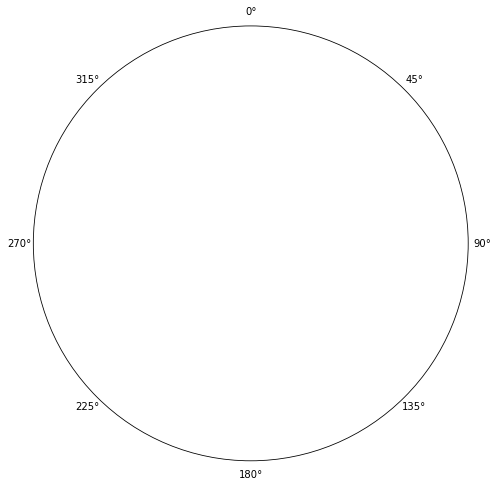

In [3]:
fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(111, projection='stereonet');

# try `ax.plane?`
ax.plane?

##### 1.4 Plot Planar Structure
In the following please plot the two structures using `ax.plane`. 
We would like to include color and label in the `ax.plane` steronet plot. Include
` c=xxx, label='xxxxx %03d/%02d' % (xxx, xxx)` in the keyword arguments of `ax.plane`.

In addition, we would like to add the legend and grid for the stereonet plot.  - `ax.grid()`and `ax.legend()`


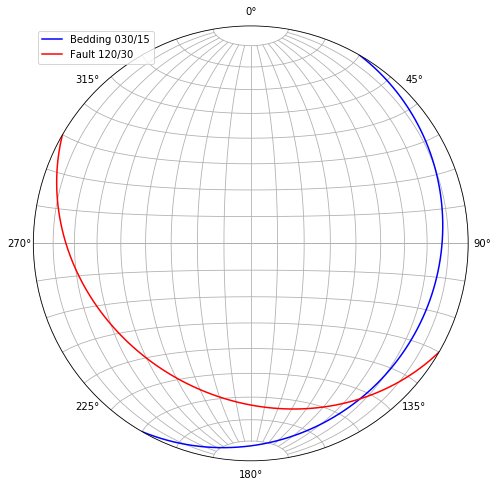

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
# Type your code below
ax.plane(strike1, dip1, c='b', label='Bedding %03d/%02d' % (strike1, dip1))
ax.plane(strike2, dip2, c='r', label='Fault %03d/%02d' % (strike2, dip2))
ax.legend()
ax.grid()


<a id='part2'></a>
### Part 2 Lai Chi Chong Bedding Data Determination

The following will introduce a case study. 

Considering a group of ESSC students went to Lai Chi Chong field trip in ESSC3010 to study the sedimentology of the [Lai Chi Chong formation](https://www.cedd.gov.hk/eng/about-us/organisation/geo/pub_info/memoirs/geology/vol/jll/index.html) . In the field, they have collected multiple measurements of the bedding layer along the coast of the silty mudstone. 

The data is collected in Lai_chi_chong_bedding.data 

***

##### 2.1 Read data in Lai_chi_chong_bedding.data 

First, let us read the data file using `numpy.loadtxt`. We would like to output a array named as `LLC_bedding` with dtype as ```integer``` and print the number of datasets and data array. 

i.e. 
```python
xxx = np.loadtxt('file', dypte=???)
```

In [5]:
LLC_bedding = np.loadtxt('Lai_chi_chong_bedding.data', dtype=int)
print(len(LLC_bedding))
print(LLC_bedding)

11
[[ 54 162]
 [ 44 122]
 [ 28 128]
 [ 56 130]
 [ 46 148]
 [ 28 126]
 [ 34 144]
 [ 44 133]
 [ 50 149]
 [ 42 139]
 [ 55 133]]


##### 2.2 Plot the stereonet

We would like to first plot the measured bedding data into stereonet. Please also add a title of `Lai Chi Chong Bedding Data` in the figure.

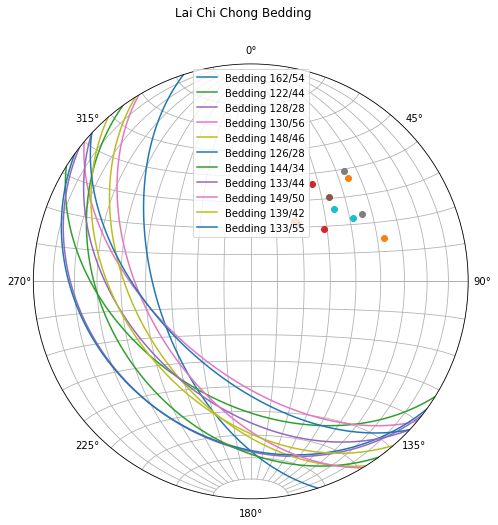

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
# Type your code below
for [dip, strike] in LLC_bedding:
    ax.plane(strike, dip, label='Bedding %03d/%02d' % (strike, dip))
    ax.pole(strike, dip)
ax.legend()
ax.grid()
fig.suptitle('Lai Chi Chong Bedding');

##### 2.3 Plot the distribution of the measurements
Since the bedding in the field are exposed and succumb to weathering and errosion, muliple measurements are made to reduce the error from human measurments and the inperfect bedding surface. Here, we would like to quantify the distribtions of the measured data and find a best fit solution representing the bedding geometry in Lai Chi Chong.

***

###### 2.3.1 Store dip and strike variable
Convert LLC_bedding array into two numpy array of dip and strike respectively and create a variable `confidence` with floating point value 99

Here we would use `mplstereonet.find_fisher_stats` function to find the mean plane out of the measurements within certain confidence level. Please read the manuel of `mplstereonet.find_fisher_stats`

question whats the difference between contourf and contour
position input for mplstereonet.find_fisher_stats with measurements = 'poles' and output

In [7]:
dip = np.array(LLC_bedding)[:,0]
strike = np.array(LLC_bedding)[:,1]
print('strikes', strike)
print('dips', dip)

confidence = 99

#mplstereonet.find_fisher_stats?

('strikes', array([162, 122, 128, 130, 148, 126, 144, 133, 149, 139, 133]))
('dips', array([54, 44, 28, 56, 46, 28, 34, 44, 50, 42, 55]))


###### 2.3.2 Function converting plunge, bearing of a pole to strike and dip of the plane

The output of the mplstereonet.find_fisher_stats are the plunge and bearing of the mean pole. Please create a function to convert (plunge, bearing) to (strike, dip)

   $$strike = bearing + 90$$
   
   $$dip = 90 - plunge$$

In [8]:
def convert(plunge, bearing):
    """return stike and dip"""
    return bearing+90, 90-plunge
print(convert(0,90))

(180, 90)


###### 2.3.3 Plot

The following we will compute the statistics and find a mean plane according to the confidence level. These functions would be included in the calculation and plot. 

```python
    # Plotting
    ax.pole
    ax.plane
    ax.density_contourf
    ax.density_contour
    
    # Computing best fit plane
    mplstereonet.find_fisher_stats
    
    # Annotations
    ax.cone
    ax.legend
    ax.grid
```
Complete the code with the guidlines listed as comments.

/Users/jeremy/opt/anaconda3/envs/lec11_stereo/lib/python2.7/site-packages/mplstereonet/stereonet_transforms.py:139: RuntimeWarning: invalid value encountered in arcsin
  return 2.0 * np.arcsin(0.5 * p)


138/43


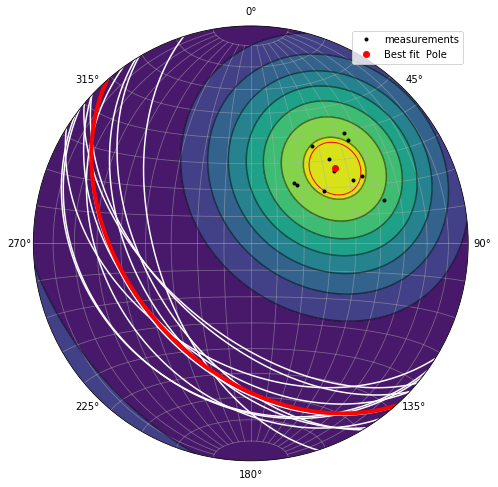

In [9]:
# Setup Figure & axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

# Plot Poles of the data with label: measurments and color in grey
ax.pole(strike, dip, color="black", markersize=3, label='measurements')

# Overlay a contour plot using ax.density_contourf
cax = ax.density_contourf(strike, dip, measurement='poles')
ax.density_contour(strike, dip, colors='black', measurement='poles', alpha=0.5)

# Plot the planes of measurments in white
ax.plane(strike, dip, color='white')

# Compute the vector and stats of the measurements using 
# mplstereonet.find_fisher_stats
vector, stats = mplstereonet.find_fisher_stats(strike, dip, \
                                               conf=confidence,\
                                               measurement="poles")

# Convert the pole vector with plunge and inclination 
# to strike and dip of a plane
mean_strike, mean_dip = convert(vector[0], vector[1])

# Plot the resulting dip and strike bedding using ax.pole and ax.plane 
# with red color and label
ax.pole(mean_strike, mean_dip, color='red', label='Best fit  Pole') 
ax.plane(vector[1]+90, 90-vector[0], color='red',linewidth=4)

# Plot the confidence level circle used in the calcualtion using
# ax.cone(plunge, inclination, stats[1], facecolor='None',edgecolor="red")
ax.cone(vector[0], vector[1], stats[1], facecolor="None", edgecolor="red")

# Add legend
ax.legend()

# Add other customized plot if you would like
#fig.colorbar(cax)
ax.grid(alpha=0.5) #alpha - transparency
#ax.cone(vector[0], vector[1], stats[1]*2, facecolor="None", edgecolor="red")

# print the resulting strike and dip using xxx(strike)/xx(dip)
print('%03d/%02d'% (mean_strike, mean_dip))

<a id='part3'></a>
### Part 3 [Optional] [Advance] 
### Determining Slump Fold Axis in Lai Chi Chong using Python 

 <img src="fig/LLC_slumpfold.jpg">
 
The photo shows a nice slump fold in Lai Chi Chong. The photo is looking North and the fold has a scale of multiple meters. In the following section, we are going to determine the folding axis using  measurements from the field trip studies.

The data is stored in `lai_chi_chong_fold.data` with format of strike and dip. Some strike data are in whole bearing and some are in relative bearing. To recall the methods locating the fold axis from measurments, the following figure show $\pi$ and $\beta$ methods. In `mplstereonet`, the function `mplstereonet.fit_girdle(*args, **kwargs)` fits a plane to a scatter of points on a stereonet, thus uses $\pi$ method to locate the fold axis. 

 <img src="fig/Fold_axis_method.gif">

###### 3.1 
Here are some usefult functions that you may use to locate the fold axis and plot in stereonet.

```python
# Plotting class
ax.density_contourf
ax.density_contour
ax.plane
ax.pole
ax.annotate
ax.grid
ax.legend
ax.set_title

# Fitting a plane and useful conversion
mplstereonet.fit_girdle
mplstereonet.pole2plunge_bearing
```

/Users/jeremy/opt/anaconda3/envs/lec11_stereo/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


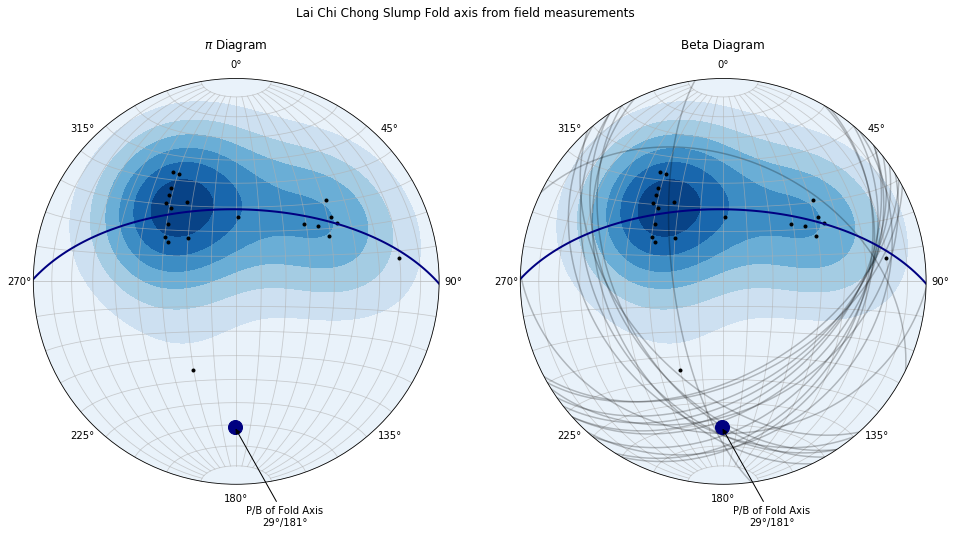

In [10]:
# Read data 
fold_data = np.loadtxt('lai_chi_chong_fold.data')
strike = np.array(fold_data)[:,0]
dip = np.array(fold_data)[:,1]


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='stereonet')

# Plot Density
ax.density_contourf(strike, dip, cmap='Blues')#cmap='gist_earth')
#ax.density_contour(strike, dip, colors='grey', linewidth=1)
ax.pole(strike, dip, marker='.', color='black')


# Fit a plane to the girdle of the distribution and display it.
fit_strike, fit_dip = mplstereonet.fit_girdle(strike, dip)
ax.plane(fit_strike, fit_dip, color='Navy', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='Navy', markersize=14)

# Add annotation of the resulting fold axis
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (bearing,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'P/B of Fold Axis\n{:02.0f}\u00b0/{:03.0f}\u00b0'
ax.annotate(template.format(plunge, bearing), ha='center', va='bottom',
            xy=(lon, lat), xytext=(50, -100), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))
ax.grid(alpha=0.6)
ax.set_title('$\pi$ Diagram', y=1.06)


## Second figure showing beta method
ax = fig.add_subplot(122, projection='stereonet')
ax.density_contourf(strike, dip, cmap='Blues')#cmap='gist_earth')
#ax.density_contour(strike, dip, colors='grey', linewidth=1)
ax.pole(strike, dip, marker='.', color='black')
ax.plane(strike, dip, color='black', alpha=0.25)

ax.plane(fit_strike, fit_dip, color='Navy', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='Navy', markersize=14)


ax.annotate(template.format(plunge, bearing), ha='center', va='bottom',
            xy=(lon, lat), xytext=(50, -100), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))
ax.grid(alpha=0.6)
ax.set_title('Beta Diagram', y=1.06)
fig.suptitle('Lai Chi Chong Slump Fold axis from field measurements');
fig.show()


<a id='part4'></a>
### Part 4 [Optional] [Advance] 
### Fault and Stress distribution using Stereonet
